In [16]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, BatchNormalization, AveragePooling1D
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataset.shape

(569, 31)

In [7]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)

In [9]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
x.shape

(569, 30)

In [11]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [12]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)

print(x_train.shape,x_test.shape,x_val.shape)

(460, 30) (52, 30) (57, 30)


In [14]:
x_train = x_train.reshape(460, 30,1)
x_test = x_test.reshape(52, 30,1)
x_val = x_val.reshape(57, 30,1)

In [18]:
input_data = Input(shape=(30,1))
#encoder
encoded = Conv1D(10, 3, activation="relu", padding = "same")(input_data)
encoded = BatchNormalization()(encoded)
encoded = AveragePooling1D(2, padding="same")(encoded) 

encoded = Conv1D(5, 3, activation="relu", padding="same")(encoded)
encoded = BatchNormalization()(encoded)
encoded = AveragePooling1D(2, padding="same")(encoded)

encoded = Conv1D(3, 3, activation="relu", padding="same")(encoded)
encoded = BatchNormalization()(encoded)
encoded = AveragePooling1D(2, padding="same")(encoded)

# 3 dimensions in the encoded layer
encoded = Conv1D(1, 2, activation="relu")(encoded)

#decoder
decoded = UpSampling1D(2)(encoded)
decoded = Conv1D(3, 3, activation='relu', padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(5, 3, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)

decoded = UpSampling1D(3)(decoded)
decoded = Conv1D(10, 3, activation='relu',padding="same")(decoded)
decoded = BatchNormalization()(decoded)

decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(decoded)

encoder = Model(input_data, encoded)

In [20]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.01)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 10)            40        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 10)            40        
_________________________________________________________________
average_pooling1d (AveragePo (None, 15, 10)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 5)             155       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 5)             20        
_________________________________________________________________
average_pooling1d_1 (Average (None, 8, 5)              0   

In [21]:
history = autoencoder.fit(x_train, x_train,epochs=500,shuffle=True,validation_data=(x_val, x_val))

Epoch 1/500
15/15 [==============================] - 3s 32ms/step - loss: 0.1198 - val_loss: 0.0785
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0998 - val_loss: 0.0746
Epoch 3/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0871 - val_loss: 0.0714
Epoch 4/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0772 - val_loss: 0.0686
Epoch 5/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0695 - val_loss: 0.0655
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0614 - val_loss: 0.0632
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0542 - val_loss: 0.0614
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0476 - val_loss: 0.0609
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0420 - val_loss: 0.0610
Epoch 10/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0376 - val_loss: 0.0613
Epo

15/15 [==============================] - 0s 10ms/step - loss: 0.0118 - val_loss: 0.0343
Epoch 83/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0122 - val_loss: 0.0339
Epoch 84/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0123 - val_loss: 0.0333
Epoch 85/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0121 - val_loss: 0.0342
Epoch 86/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0117 - val_loss: 0.0334
Epoch 87/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0117 - val_loss: 0.0337
Epoch 88/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0116 - val_loss: 0.0337
Epoch 89/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0120 - val_loss: 0.0331
Epoch 90/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0117 - val_loss: 0.0340
Epoch 91/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0115 - val_loss: 0.0341
Epoch 9

15/15 [==============================] - 0s 12ms/step - loss: 0.0096 - val_loss: 0.0318
Epoch 163/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0093 - val_loss: 0.0319
Epoch 164/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0100 - val_loss: 0.0320
Epoch 165/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0096 - val_loss: 0.0321
Epoch 166/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0337
Epoch 167/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0096 - val_loss: 0.0337
Epoch 168/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0340
Epoch 169/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0098 - val_loss: 0.0334
Epoch 170/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0093 - val_loss: 0.0341
Epoch 171/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0312
E

Epoch 243/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0083 - val_loss: 0.0315
Epoch 244/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0088 - val_loss: 0.0309
Epoch 245/500
15/15 [==============================] - 1s 36ms/step - loss: 0.0084 - val_loss: 0.0314
Epoch 246/500
15/15 [==============================] - 0s 17ms/step - loss: 0.0083 - val_loss: 0.0312
Epoch 247/500
15/15 [==============================] - 0s 21ms/step - loss: 0.0084 - val_loss: 0.0304
Epoch 248/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0087 - val_loss: 0.0306
Epoch 249/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0084 - val_loss: 0.0316
Epoch 250/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0085 - val_loss: 0.0316
Epoch 251/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0084 - val_loss: 0.0306
Epoch 252/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0086 

15/15 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 0.0294
Epoch 324/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0080 - val_loss: 0.0294
Epoch 325/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0298
Epoch 326/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0298
Epoch 327/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0299
Epoch 328/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0294
Epoch 329/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0293
Epoch 330/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0295
Epoch 331/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0296
Epoch 332/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0080 - val_loss: 0.0291
Epo

15/15 [==============================] - 0s 8ms/step - loss: 0.0077 - val_loss: 0.0291
Epoch 405/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0287
Epoch 406/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0282
Epoch 407/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0283
Epoch 408/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0290
Epoch 409/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0074 - val_loss: 0.0289
Epoch 410/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0285
Epoch 411/500
15/15 [==============================] - 0s 26ms/step - loss: 0.0074 - val_loss: 0.0289
Epoch 412/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0285
Epoch 413/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0288


15/15 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.0282
Epoch 486/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0290
Epoch 487/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0074 - val_loss: 0.0306
Epoch 488/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0073 - val_loss: 0.0291
Epoch 489/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.0297
Epoch 490/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0285
Epoch 491/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0281
Epoch 492/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.0291
Epoch 493/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.0276
Epoch 494/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0280
E

In [22]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

2/2 [==============================] - 0s 5ms/step - loss: 0.0311
Loss: 0.031129879876971245


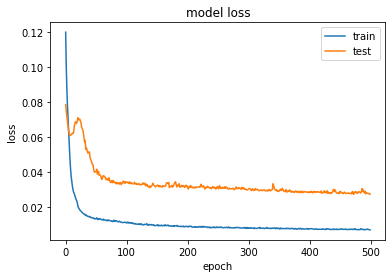

In [23]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ConvAE_model_loss.png')
plt.show()

In [24]:
autoencoder.evaluate(x_test, x_test)
#model.save('si_autoencoder.model')
data = autoencoder.predict(x_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0311


In [25]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [30]:
# Dimentionality reduction for 30 features to 3

x_test.shape

(52, 30, 1)

In [27]:
latent_vector.shape

(52, 3, 1)

In [32]:
latent_vector = latent_vector.reshape(52, 3)
latent_vector_train = latent_vector_train.reshape(460, 3)

In [33]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

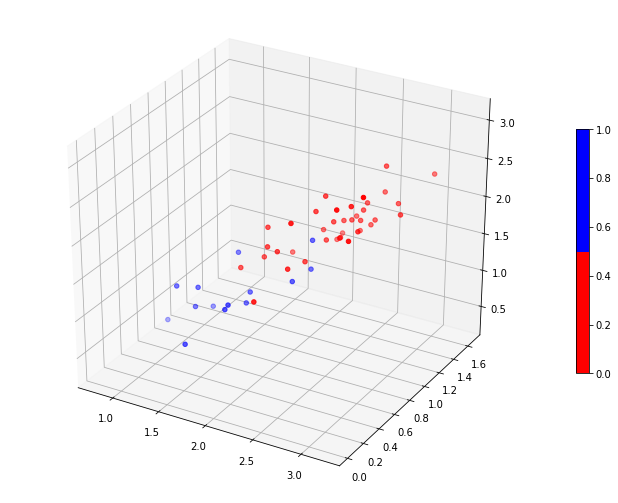

In [34]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('ConvAE_3d.png')
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7884615384615384 and k :  [1]


In [36]:
y_pred=knn.predict(latent_vector)

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.23076923076923078
Mean Squared Error: 0.23076923076923078
Root Mean Squared Error: 0.4803844614152614
[[26 12]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        38
           1       0.54      1.00      0.70        14

    accuracy                           0.77        52
   macro avg       0.77      0.84      0.76        52
weighted avg       0.88      0.77      0.78        52

